In [1]:
pip install prophet


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/12/ff/a04156f4ca3d18bd005c73f79e86e0684346fbc2aea856429c3e49f2828e/prophet-1.1.6-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/5d/12/6522f3de83ca690aa52f4b8c88a1e203abb1e2d75c31669dc004949143cd/cmdstanpy-1.2.4-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/e1/6a/4604f9ae2fa62ef47b9de2fa5ad599589d28c9fd1d335f32759813dfa91e/importlib_resources-6.4.5-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.org/packages/56/87/37a80e4d5bd453c33262d8fb618b6840fd98d24ed08e046a4a9b10177fa3/stanio-0.5.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


# Import the Libraries

In [21]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt


# Data Preprocessing

In [22]:
# Load the dataset
file_path = "D:/Downloads/Coconut_Production.csv"  
df = pd.read_csv(file_path)

In [23]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m')  
df = df.rename(columns={'Time': 'ds', 'Production': 'y'})   

- **Test -Train split**

In [24]:
# Split data into training and testing sets
train = df[:-12]  
test = df[-12:]   


# Model Training

In [25]:
# Initialize and fit the Prophet model 

model = Prophet(
# Default Parameters
growth='linear',
    yearly_seasonality='auto', 
    weekly_seasonality='auto', 
    daily_seasonality='auto', 
    seasonality_mode='additive',
    seasonality_prior_scale=10.0,
    holidays=None,
    n_changepoints=25,
    changepoint_range=0.8,
    changepoint_prior_scale=0.05,
    mcmc_samples=0,
    interval_width=0.80,
    uncertainty_samples=1000,
    stan_backend=None    
)  



model.fit(train)

13:28:40 - cmdstanpy - INFO - Chain [1] start processing
13:28:40 - cmdstanpy - INFO - Chain [1] done processing


# Model Evaluation

In [26]:
# Make predictions on the test set
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Extract predictions for the test period
test_forecast = forecast[-12:][['ds', 'yhat']]

In [27]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['y'], test_forecast['yhat']))
mape = mean_absolute_percentage_error(test['y'], test_forecast['yhat'])

# Print RMSE and MAPE
print(f'RMSE: {rmse}')
print(f'MAPE: {mape * 100:.2f}%')


RMSE: 5.982159939972054
MAPE: 1.77%


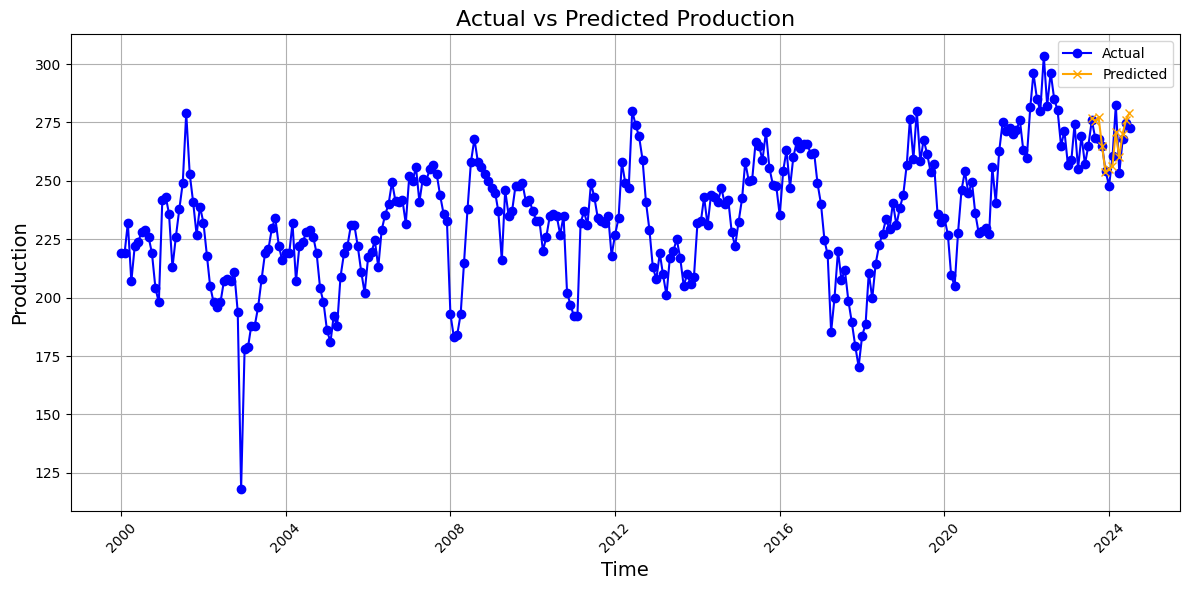

In [28]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], label='Actual', color='blue', marker='o')
plt.plot(test_forecast['ds'], test_forecast['yhat'], label='Predicted', color='orange', marker='x')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Production', fontsize=14)
plt.title('Actual vs Predicted Production', fontsize=16)
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Future Forecasting for 3 months (short term)

In [29]:
# Forecast for the next 3 months (July, August, September)
future_forecast = model.make_future_dataframe(periods=3, freq='M')
final_forecast = model.predict(future_forecast)

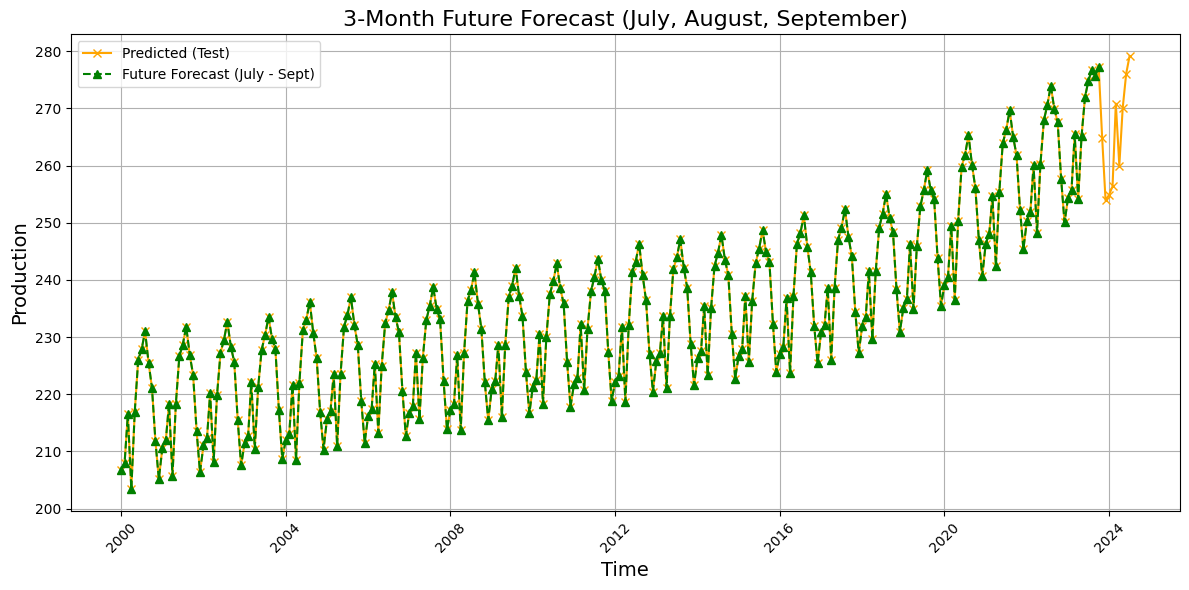

In [20]:
# Plot future forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted (Test)', color='orange', marker='x')
plt.plot(final_forecast['ds'], final_forecast['yhat'], label='Future Forecast (July - Sept)', color='green', marker='^', linestyle='--')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Production', fontsize=14)
plt.title('3-Month Future Forecast (July, August, September)', fontsize=16)
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
